In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv", header=None)
df_test = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)

In [3]:
df= pd.concat([df_train,df_test],ignore_index=True,sort=False)

In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [6]:
import imblearn
from imblearn.over_sampling import SMOTE

In [7]:
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X_train,y_train)

In [8]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
model.add(Dropout(0.6))

model.add(Flatten())

model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dense(units = 5, activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=10,validation_split=0.2,batch_size=64,verbose=1)

Epoch 1/10
958/958 [==============================] - 9s 6ms/step - loss: 0.3286 - accuracy: 0.9084 - val_loss: 0.1100 - val_accuracy: 0.9702
Epoch 2/10
958/958 [==============================] - 5s 5ms/step - loss: 0.1167 - accuracy: 0.9674 - val_loss: 0.0946 - val_accuracy: 0.9751
Epoch 3/10
958/958 [==============================] - 5s 5ms/step - loss: 0.0900 - accuracy: 0.9739 - val_loss: 0.0757 - val_accuracy: 0.9793
Epoch 4/10
958/958 [==============================] - 5s 5ms/step - loss: 0.0749 - accuracy: 0.9768 - val_loss: 0.0620 - val_accuracy: 0.9821
Epoch 5/10
958/958 [==============================] - 5s 5ms/step - loss: 0.0649 - accuracy: 0.9796 - val_loss: 0.0601 - val_accuracy: 0.9830
Epoch 6/10
958/958 [==============================] - 5s 5ms/step - loss: 0.0533 - accuracy: 0.9836 - val_loss: 0.0616 - val_accuracy: 0.9825
Epoch 7/10
958/958 [==============================] - 5s 5ms/step - loss: 0.0480 - accuracy: 0.9843 - val_loss: 0.0660 - val_accuracy: 0.9812
Epoch 

In [11]:
pred = model.predict(X_test)

In [12]:
y_pred=np.argmax(pred,axis=1)

In [13]:
from sklearn.metrics import classification_report
print("Accuracy with CNN is:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy with CNN is: 0.985959675945666
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     27096
         1.0       0.93      0.78      0.85       852
         2.0       0.98      0.95      0.97      2161
         3.0       0.94      0.70      0.80       232
         4.0       0.99      0.99      0.99      2493

    accuracy                           0.99     32834
   macro avg       0.97      0.88      0.92     32834
weighted avg       0.99      0.99      0.99     32834



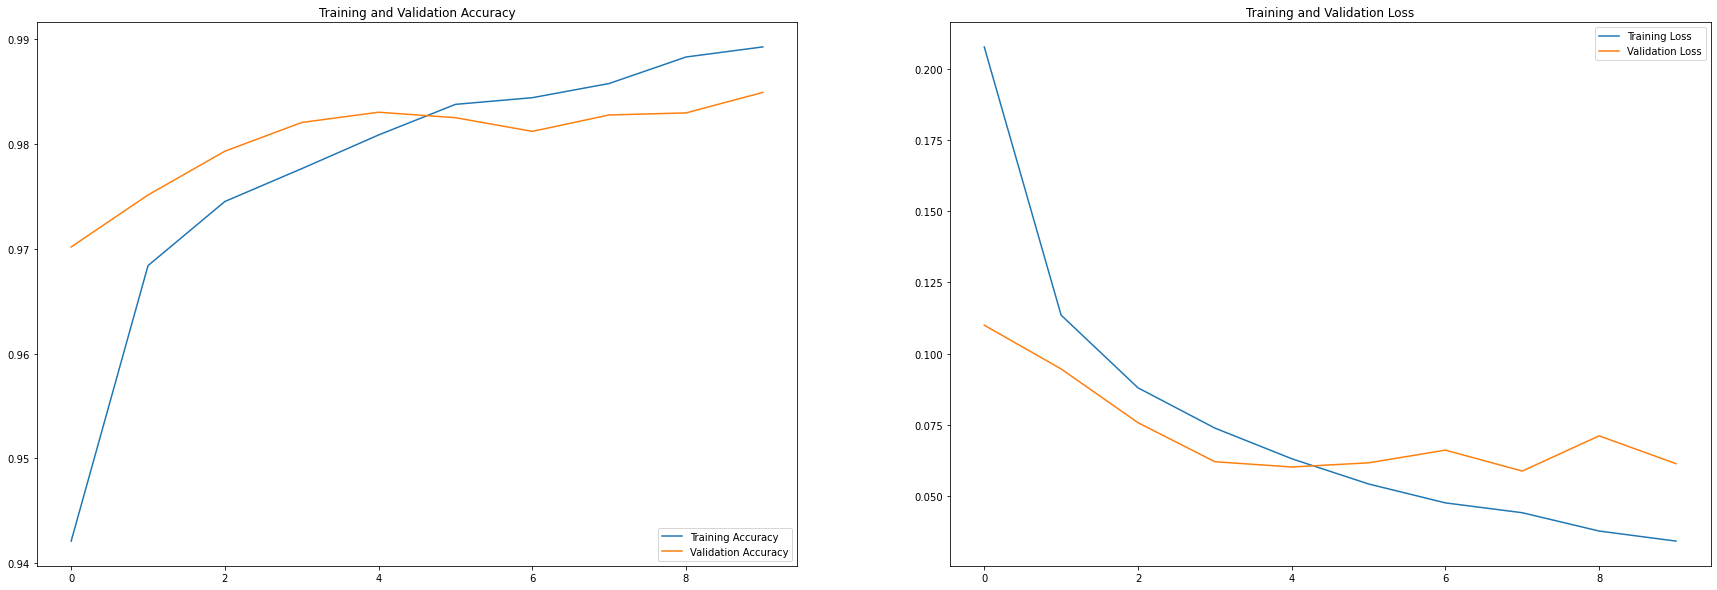

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[27025    43    18     2     8]
 [  182   666     3     0     1]
 [   89     3  2057     8     4]
 [   50     0    19   163     0]
 [   26     1     4     0  2462]]


In [16]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

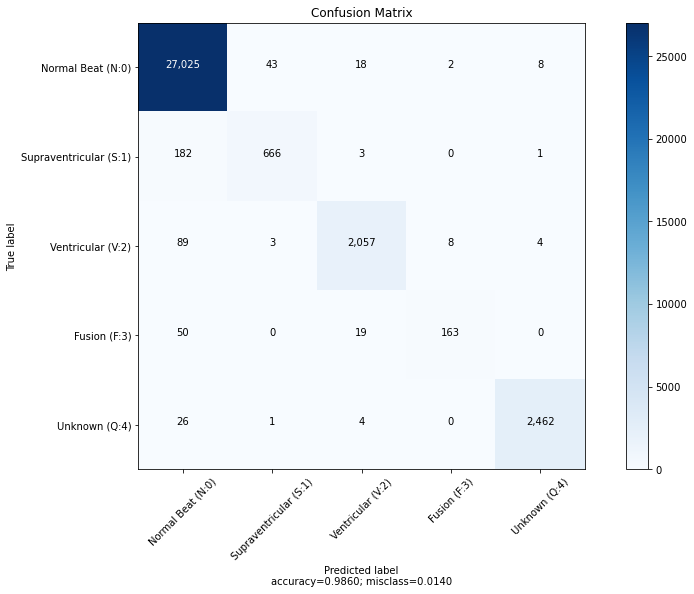

In [17]:
plot_confusion_matrix(cf_matrix,
                      normalize    = False,
                      target_names = ["Normal Beat (N:0)",
                                         "Supraventricular (S:1)",
                                         "Ventricular (V:2)",
                                         "Fusion (F:3)",
                                         "Unknown (Q:4)"],
                      title        = "Confusion Matrix")

CNN peformed better so we use this same model and turn this problem into a binary classification problem
Normal beat as 0 and rest of the beats as 1

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109441,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109442,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109443,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109444,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [19]:
df[187].value_counts()

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

In [20]:
df[187]=df[187].map({4.0:1,2.0:1,3.0:1})

In [21]:
df[187].value_counts()

1.0    16078
Name: 187, dtype: int64

In [22]:
df=df.fillna(0)

class distribution


<AxesSubplot:>

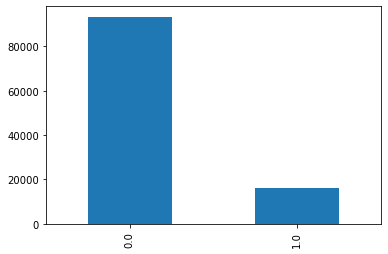

In [23]:
print('class distribution')
df[187].value_counts().plot(kind='bar')

In [24]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [26]:
import imblearn
from imblearn.over_sampling import SMOTE

In [27]:
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X_train,y_train)

In [28]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [29]:
history2 = model.fit(X_train, y_train, epochs=10,validation_split=0.2,batch_size=64,verbose=1)

Epoch 1/10
958/958 [==============================] - 5s 5ms/step - loss: 0.0411 - accuracy: 0.9876 - val_loss: 0.0231 - val_accuracy: 0.9928
Epoch 2/10
958/958 [==============================] - 5s 5ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0265 - val_accuracy: 0.9920
Epoch 3/10
958/958 [==============================] - 5s 5ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0335 - val_accuracy: 0.9914
Epoch 4/10
958/958 [==============================] - 5s 5ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0233 - val_accuracy: 0.9933
Epoch 5/10
958/958 [==============================] - 5s 5ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0231 - val_accuracy: 0.9932
Epoch 6/10
958/958 [==============================] - 5s 5ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.0252 - val_accuracy: 0.9931
Epoch 7/10
958/958 [==============================] - 5s 5ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0272 - val_accuracy: 0.9926
Epoch 

In [30]:
pred_value=model.predict(X_test)

In [31]:
y_pred=np.argmax(pred_value,axis=1)

In [32]:
from sklearn.metrics import classification_report
print("Accuracy with CNN (Binary) is:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy with CNN (Binary) is: 0.9948833526222818
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27948
         1.0       0.99      0.98      0.98      4886

    accuracy                           0.99     32834
   macro avg       0.99      0.99      0.99     32834
weighted avg       0.99      0.99      0.99     32834



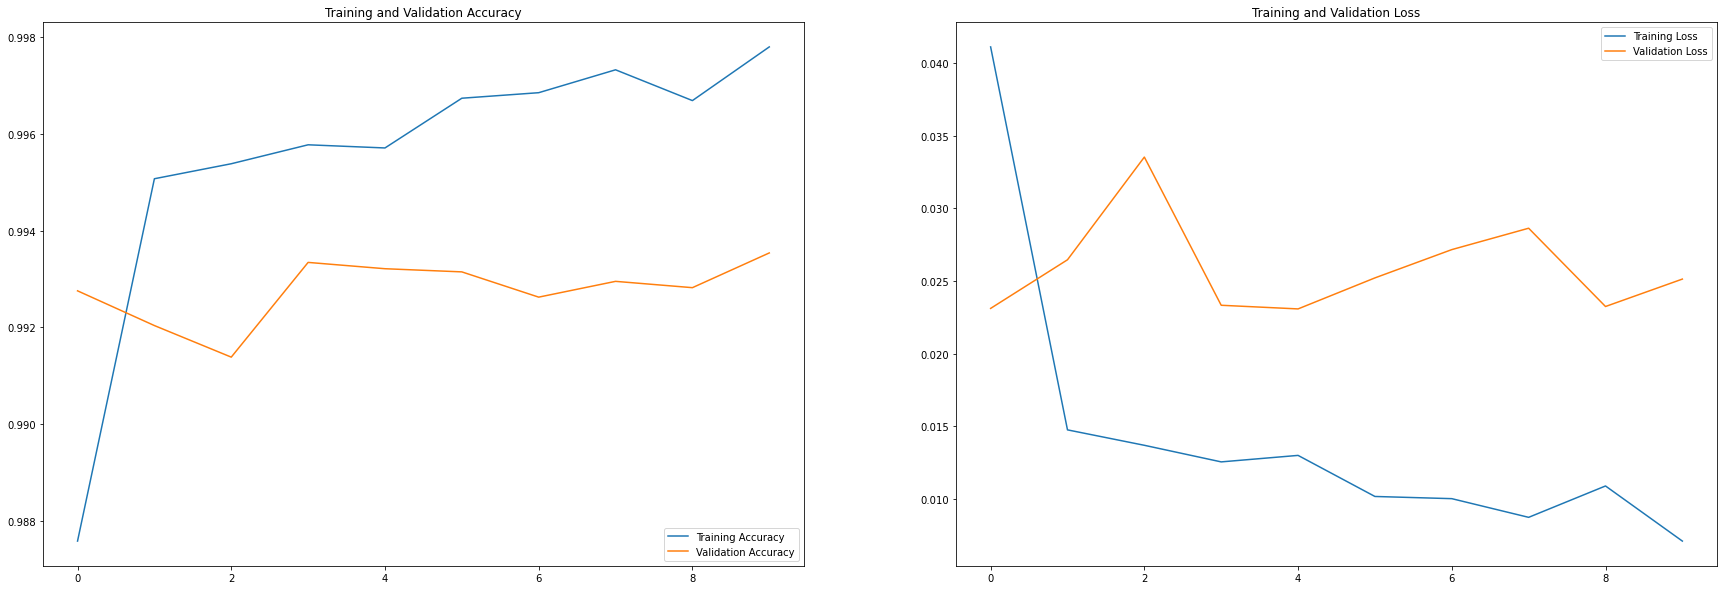

In [33]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[27886    62]
 [  106  4780]]


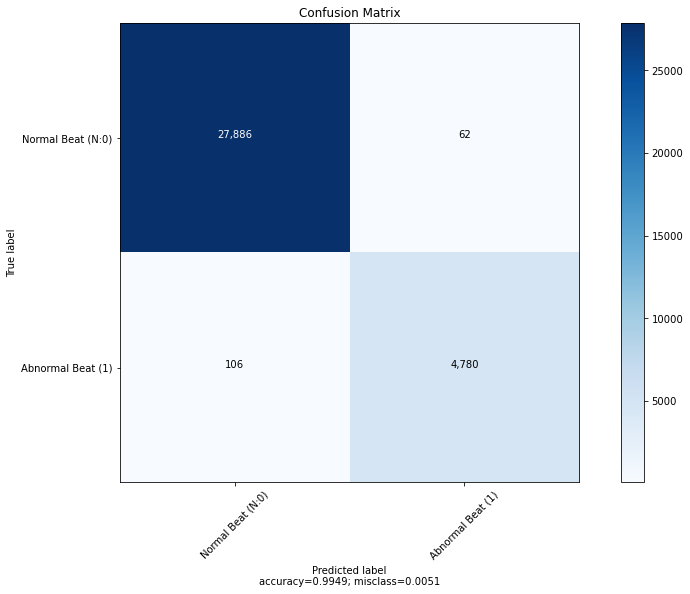

In [35]:
plot_confusion_matrix(cf_matrix,
                      normalize    = False,
                      target_names = ["Normal Beat (N:0)",
                                        "Abnormal Beat (1)"],
                      title        = "Confusion Matrix")

In [36]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [37]:
from sklearn.metrics import roc_curve,auc
fpr_keras, tpr_keras, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.9880434783245489

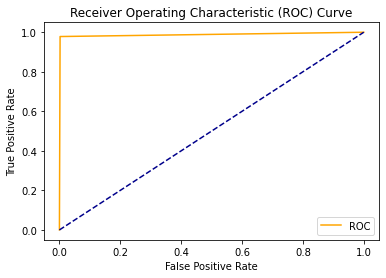

In [38]:
plot_roc_curve(fpr_keras, tpr_keras)